# Network diffusion with NDlib

Ok so I learned that [`NDlib`](https://github.com/GiulioRossetti/ndlib) exists, and the research publication is on my to-read list.

* G. Rossetti, L. Milli, S. Rinzivillo, A. Sirbu, D. Pedreschi, F. Giannotti. NDlib: a Python Library to Model and Analyze Diffusion Processes Over Complex Networks. *Journal of Data Science and Analytics*. 2017. DOI:0.1007/s41060-017-0086-6

Looks pretty nice, I will want to get the hang of it. I read the tutorial already, and will want to do a bit of simulations to get experience.

## Key concepts

* Simulation $S = \langle G, M_C\rangle$
* Graph $G = \langle N, \langle G \rangle \rangle$ with nodes N and edges E
* Model $M$ describes a discrete-time agent-based simulation
* Configuration $C$ describe initial status and configuration of $M$

In [1]:
import ndlib
import networkx as nx

## Basic tutorial

An example graph

In [2]:
G = nx.erdos_renyi_graph(2000, 0.15)

The model, let's use [`VoterModel`](http://ndlib.readthedocs.io/en/latest/reference/models/opinion/Voter.html)

> The Voter model is one of the simplest models of opinion dynamics, originally introduced to analyse competition of species and soon after applied to model elections.
>
> The state of the population varies based on a very simple update rule: at each iteration, a random individual is selected, who then copies the opinion of one random neighbour.

In [3]:
import ndlib.models.opinions.VoterModel
vm = ndlib.models.opinions.VoterModel.VoterModel(G)

Set the configuration, the Voter model has two possible parameters: float [0, 1] `percentage_infected` and set of nodes `Infected`.

In [4]:
import ndlib.models.ModelConfig
c = ndlib.models.ModelConfig.Configuration()
c.add_model_parameter('percentage_infected', 0.1)
vm.set_initial_status(c)

Four kinds of parameters for the models.

* Model parameters
* Node parameters
* Edge parameters
* Simulation initial status

### Modelling

First one iteration

In [5]:
it_id, _, it_status, _ = vm.iteration()

Then a couple of iterations

In [6]:
it_bunch = vm.iteration_bunch(bunch_size=1000)

### Visualization

With `ndlib.viz.bokeh.DiffusionTrend` and `ndlib.viz.mpl.DiffusionTrend`, using Bokeh and Matplotlib, respectively.

In [7]:
import bokeh
import ndlib.viz.bokeh.DiffusionTsrend

bokeh.plotting.output_notebook()

Loading BokehJS ...

In [8]:
trends = vm.build_trends(it_bunch)
viz = ndlib.viz.bokeh.DiffusionTrend.DiffusionTrend(vm, trends)
p = viz.plot()
bokeh.plotting.show(p)

# SIR model

[SIR model](http://ndlib.readthedocs.io/en/latest/reference/models/epidemics/SIR.html) parameters are infection probability *β*, and removal probability *γ*, and *percentage_infected*.

In [9]:
import ndlib.models.epidemics.SIRModel

sir_m = ndlib.models.epidemics.SIRModel.SIRModel(G)
sir_c = ndlib.models.ModelConfig.Configuration()
sir_c.add_model_parameter('beta', 0.015)
sir_c.add_model_parameter('gamma', 0.01)
sir_c.add_model_parameter('percentage_infected', 0.1)
sir_m.set_initial_status(sir_c)

Run simulation

In [10]:
sir_iters = sir_m.iteration_bunch(500)
sir_trends = sir_m.build_trends(sir_iters)

Visualization, this time with Matploblib

In [11]:
import matplotlib.pyplot as plt
import ndlib.viz.mpl.DiffusionTrend
%matplotlib inline

no display found. Using non-interactive Agg backend


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ndlib/viz/mpl/DiffusionViz.py:7: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/traitlets/config/application.py", line 6

In [12]:
sir_viz = ndlib.viz.mpl.DiffusionTrend.DiffusionTrend(sir_m, sir_trends)

The `DiffusionTrend` object has all kinds of methods, one of them is for plotting

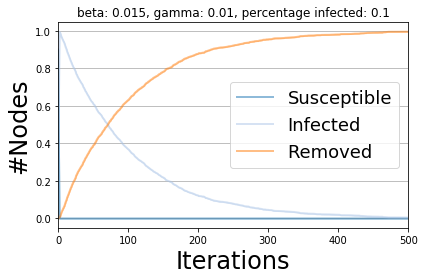

In [13]:
sir_viz.plot()